# Polynomial Model

This section provides implementation for concepts related to polynomial model. First, a simple linear model (polynomial model with order=1) is discussed. Then, polynomial models with different orders are also demonstrated. The concept of simple and k-fold cross validation is also described using the polynomial model.

> __NOTE__: You need to install `scikit learn` package using `pip install scikit-learn`. This package provides various tools for building machine learning models in Python. Also, install the latest version of `scimlstudio` package as described in setup section.

A general $n^{th}$ order polynomial model is written as $y = \pmb{\Psi} \cdot \mathbf{w}^T$, where $\pmb{\psi}$ and $\mathbf{w}$ are the basis and weight vectors, respectively. The $\pmb{\Psi}$ and $\mathbf{w}$ are given as

$$
    \pmb{\Psi} = [1 \quad x \quad \dots \quad x^{n-1} \quad x^n]^T \quad \text{and} \quad \mathbf{w} = [w_1 \quad w_2 \quad \dots \quad w_{n-1} \quad w_{n}]^T
$$

The goal is to find the weight vector $\mathbf{w}$ for a given data, which can then be used for inference. Refer to lecture notes for more details.

> __NOTE__: The above polynomial model is for one variable only.

## Linear model

This sub-section illustrates how to create a linear model using the `Polynomial` model class from `scimlstudio`. Note that a linear model is just a polynomial model with order = 1. This implies that the basis vector will be $\pmb{\Psi} = [1 \quad x]^T$.

Below block of code defines the training dataset and plots it:

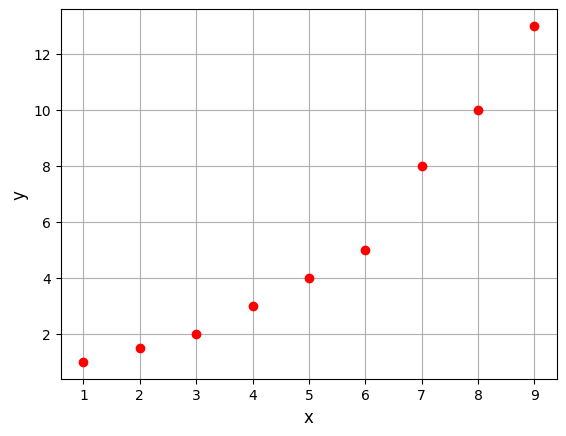

In [1]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dtype = torch.float64
args = {"device": device, "dtype":dtype}

# training data
xtrain = torch.linspace(1, 9, 9, **args)
ytrain = torch.tensor([1, 1.5, 2, 3, 4, 5, 8, 10, 13], **args)

# Plotting the training data
fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain.numpy(force=True), ytrain.numpy(force=True), 'ro', label='Training data')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()

The first step is to create a polynomial model is to import the `Polynomial` model class from the `scimlstudio` package. This class takes three arguments during initialization:

* `xtrain`: a 2D torch tensor array of shape (N,1)
* `ytrain`: a 2D torch tensor array of shape (N,1)
* `order`: a positive integer defining the order of the polynomial

Here, `N` is the number of data points. Using these three arguments, the polynomial class can be initialized. Next, the `fit` method is called to compute the weight vector of the polynomial. This method does not take any inputs. Once the model is fitted, `predict` method can be used to determine $y$ for a given $x$. Note that the input to the `predict` method should also be 2D torch tensor array of shape (M,1), where `M` is the number of test points.

Below block of code performs above steps to fit a linear model to the dataset defined in previous block:

In [2]:
from scimlstudio.models import Polynomial # import polynomial model

# initialize the polynomial model
model = Polynomial(
    xtrain=xtrain.reshape(-1,1), 
    ytrain=ytrain.reshape(-1,1), 
    order=1 # linear model
)

w = model.fit()

print(f"Weights - linear model: {w.reshape(-1,)}")

Weights - linear model: tensor([-2.0139,  1.4583], device='cuda:0', dtype=torch.float64)


Below code block uses the fitted linear model to do prediction:

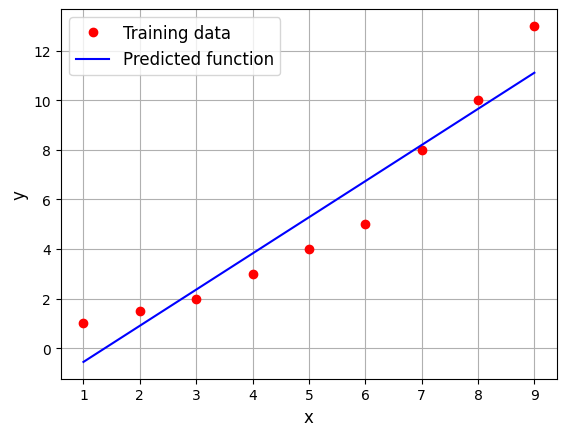

In [3]:
# Testing x
xtest = torch.linspace(1, 9, 100, **args)

# Predicting the output
ypred = model.predict(xtest.reshape(-1,1))

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain.numpy(force=True), ytrain.numpy(force=True), 'ro', label='Training data')
ax.plot(xtest.numpy(force=True), ypred.numpy(force=True), 'b-', label='Predicted function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
_ = ax.legend(fontsize=fs)

## $2^{nd}$ order model

Now, we will fit a $2^{nd}$ order model to the data defined in previous blocks. The basis function vector will be:

$$
\pmb{\Psi} = [1\quad x \quad x^2]^T
$$

Below code block builds a $2^{nd}$ order model:

Weights - 2nd order model: tensor([ 1.4881, -0.4518,  0.1910], device='cuda:0', dtype=torch.float64)


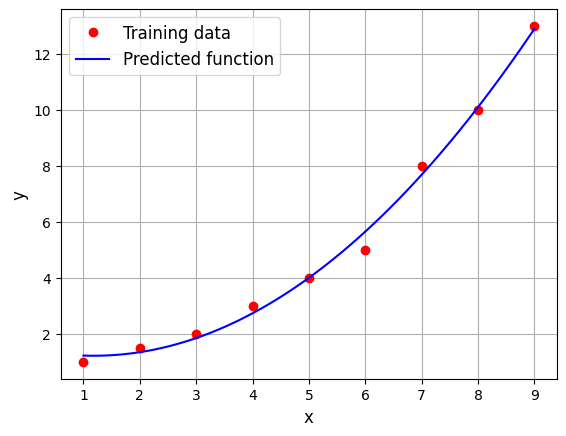

In [4]:
# initialize the polynomial model
model = Polynomial(
    xtrain=xtrain.reshape(-1,1), 
    ytrain=ytrain.reshape(-1,1), 
    order=2
)

w = model.fit()

print(f"Weights - 2nd order model: {w.reshape(-1,)}")

# Testing x
xtest = torch.linspace(1, 9, 100, **args)

# Predicting the output
ypred = model.predict(xtest.reshape(-1,1))

fs = 12
fig, ax = plt.subplots()
ax.plot(xtrain.numpy(force=True), ytrain.numpy(force=True), 'ro', label='Training data')
ax.plot(xtest.numpy(force=True), ypred.numpy(force=True), 'b-', label='Predicted function')
ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.grid()
_ = ax.legend(fontsize=fs)

You can notice that $2^{nd}$ order model fits much better than the linear model. Note that the order of the model is a **hyperparameter** of the model i.e. it is not learnt from the data. Only the weights are determined from the data.

Depending on the model, there are various kinds of hyperparameters. One can use some cross validation techniques to estimate good value for hyperparameters. Next sub-section describes simple and k-fold cross validation to estimate the order of the poylnomial but this process can be applied to any model to determine good set of hyperparameter values. Refer to lecture notes for more details about these validation techniques.

We will be using following function to generate data some dummy data to demonstrate validation techniques:

$$
    f(x) = (6x - 2)^2sin(12x-4) + \epsilon
$$

where $\epsilon \sim \mathcal{N}(0,1) \text{ and } 0 \leq x \leq 1$. This will generate a noisy data around function $(6x - 2)^2sin(12x-4)$. Below block of code generates 20 noisy samples and plots it.

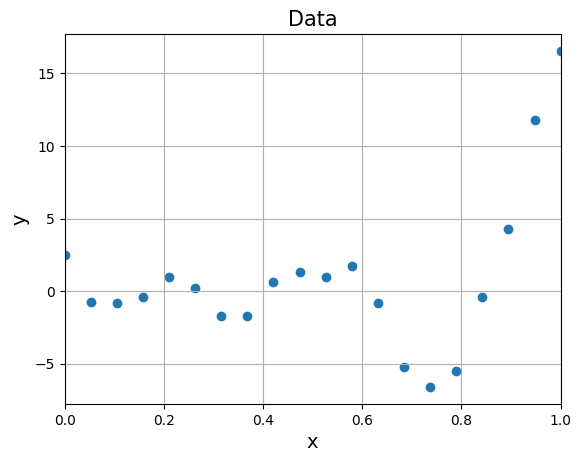

In [5]:
# Few variables
num_samples = 20
xlower = 0
xupper = 1

torch.manual_seed(15) # fix seed for reproducibility

# Training data
x = torch.linspace(xlower, xupper, num_samples, **args)
y = (6*x - 2)**2 * torch.sin(12*x - 4) + torch.randn_like(x, **args)

# Plotting
plt.scatter(x.numpy(force=True), y.numpy(force=True))
plt.xlim((xlower, xupper))
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Data", fontsize=15)
plt.grid()

Below block of code fits a $2^{nd}$ order polynomial to the above noisy data and plots the prediction for test data:

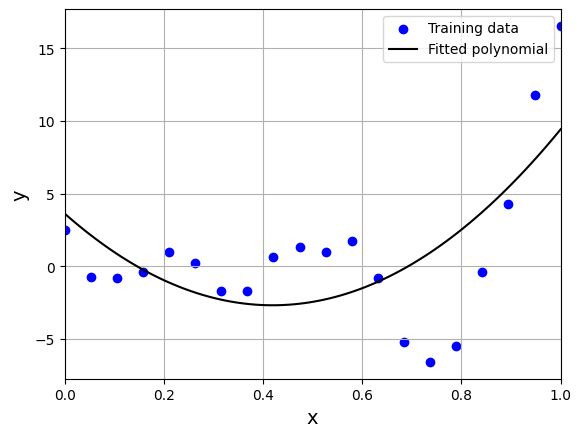

In [6]:
# initialize the polynomial model
model = Polynomial(
    xtrain=x.reshape(-1,1), 
    ytrain=y.reshape(-1,1), 
    order=2
)

w = model.fit() # fit the model

xtest = torch.linspace(xlower, xupper, 100, **args) # Test input values

ypred = model.predict(xtest.reshape(-1,1)) # Prediction

# Plotting the predicted values and data
plt.scatter(x.numpy(force=True), y.numpy(force=True), c="b", label="Training data")
plt.plot(xtest.numpy(force=True), ypred.numpy(force=True), "k", label="Fitted polynomial")
plt.xlim((xlower, xupper))
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid()

We can see that model is not able to capture the underlying trend in the data. We will now use cross-validation techniques to find the order of the polynomial.

## Simple validation

For performing simple cross-validation, data needs to be split into two parts - training and testing. To do this, `train_test_split` method from `scikit-learn` will be used. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn-model-selection-train-test-split) for more details.

Below block of code splits the data into two parts, performs simple cross validation by fitting polynomial of various orders and calculates normalized RMSE. Finally, it plots the variation of NRMSE with respect to order of polynomial. Read comments in the code for more details.

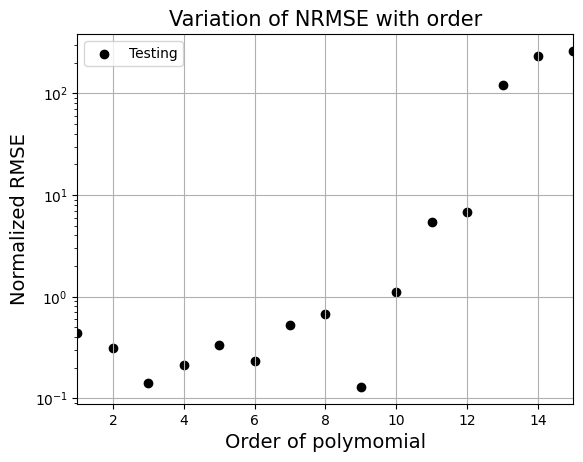

In [7]:
from scimlstudio.utils import evaluate_scalar
from sklearn.model_selection import train_test_split

# Creating a list which contains orders
orders = [i for i in range(1, 16)]

# Spliting the data into two parts
# Data is split into 75% training and 25% testing
# Note: random_state fixes the seed, so the results are same everytime
xtrain, xtest, ytrain, ytest = train_test_split(x.numpy(force=True), y.numpy(force=True), test_size=0.25, random_state=5)

# Initializing normalized RMSE list
test_metric = []

for order in orders:

    # Fit a particular order of polynomial
    model = Polynomial(
        xtrain = torch.from_numpy(xtrain).to(**args).reshape(-1,1),
        ytrain = torch.from_numpy(ytrain).to(**args).reshape(-1,1),
        order = int(order)
    )

    model.fit()
    
    # Get the prediction at testing points
    ytest_pred = model.predict(torch.from_numpy(xtest).to(**args).reshape(-1,1))

    # Calculate normalized rmse for testing prediction
    nrmse = evaluate_scalar(torch.from_numpy(ytest).to(**args), ytest_pred.reshape(-1,), metric="nrmse")

    test_metric.append(nrmse)

# Plotting the NRMSE
plt.scatter(orders, test_metric, c="k", label="Testing")
plt.xlim((orders[0], orders[-1]))
plt.xlabel("Order of polymomial", fontsize=14)
plt.ylabel("Normalized RMSE", fontsize=14)
plt.yscale("log")
plt.legend()
plt.grid()
_ = plt.title("Variation of NRMSE with order".format(order), fontsize=15)

From the above graph, order = 9 gives the least nrmse. Below block of code fits polynomial of order 9 to data and plots it. Feel free to change the order and see what happens to the fit.

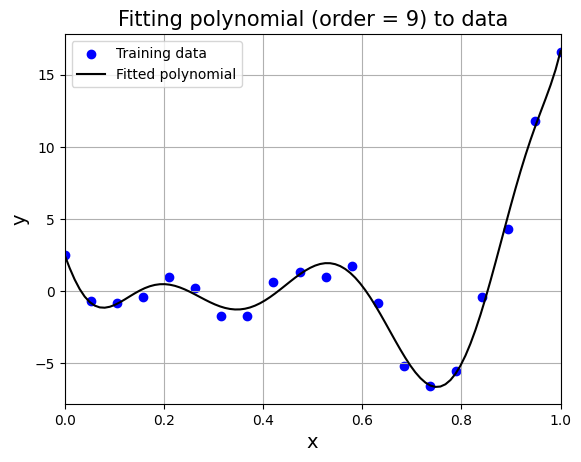

In [8]:
# initialize the polynomial model
model = Polynomial(
    xtrain=x.reshape(-1,1), 
    ytrain=y.reshape(-1,1), 
    order=9
)

w = model.fit() # fit the model

xtest = torch.linspace(xlower, xupper, 100, **args) # Test input values

ypred = model.predict(xtest.reshape(-1,1)) # Prediction

# Plotting the predicted values and data
plt.scatter(x.numpy(force=True), y.numpy(force=True), c="b", label="Training data")
plt.plot(xtest.numpy(force=True), ypred.numpy(force=True), "k", label="Fitted polynomial")
plt.xlim((xlower, xupper))
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.title("Fitting polynomial (order = 9) to data", fontsize=15)
plt.grid()

## K-fold cross validation

To implement K-fold cross validation, dataset needs to be split into k smaller sets. `KFold` method within `scikit-learn` will be used to split the dataset. Read [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn-model-selection-kfold) for more information. Below block of code performs 5-fold cross validation to find the order of polynomial. Read comments in the code for more details.

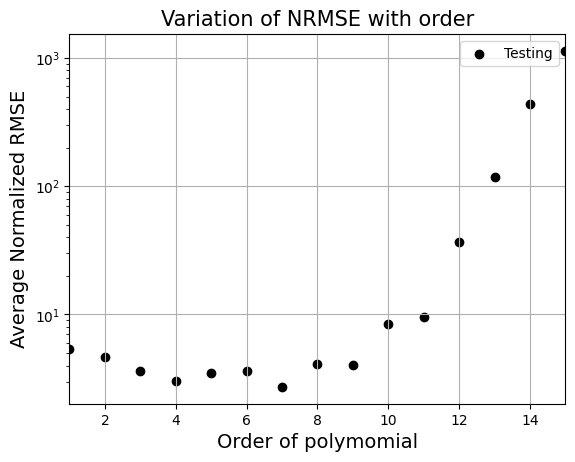

In [9]:
from sklearn.model_selection import KFold

# Creating 1d numpy array which contains orders
orders = [i for i in range(1, 16)]

# number of folds
n_splits = 5

# Initializing normalized RMSE list
test_metric = []

# Initializing the K Fold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=590)

# Fitting various polynomials
for order in orders:
    
    # Setting starting value of nrmse
    nrmse = 0
    
    # Fitting the polynomial of a particular order to each fold
    # and computing nrmse of the fit
    for (train_index, test_index) in kf.split(x):
        
        # Get training data
        xtrain = x[train_index]
        ytrain = y[train_index]
        
        # Get testing data
        xtest = x[test_index]
        ytest = y[test_index]

        # Initialize the polynomial model
        model = Polynomial(
            xtrain=xtrain.reshape(-1,1), 
            ytrain=ytrain.reshape(-1,1), 
            order=order
        )

        # Fit the model
        model.fit()

        # Predict for test data
        ytest_pred = model.predict(xtest.reshape(-1,1)).reshape(-1,)
        
        # Adding all the nrmse to calculate average later
        nrmse = nrmse + evaluate_scalar(ytest, ytest_pred)
        
    # Calculating average nrmse
    test_metric.append(nrmse/n_splits)

# Plotting the NRMSE
plt.scatter(orders, test_metric, c="k", label="Testing")
plt.xlim((orders[0], orders[-1]))
plt.xlabel("Order of polymomial", fontsize=14)
plt.ylabel("Average Normalized RMSE", fontsize=14)
plt.yscale("log")
plt.legend()
plt.grid()
_ = plt.title("Variation of NRMSE with order".format(order), fontsize=15)

From the above graph, order = 7 gives least nrmse. Below block of code fits polynomial of order 7 to data and plots it. Feel free to change the order and see what happens to the fit.

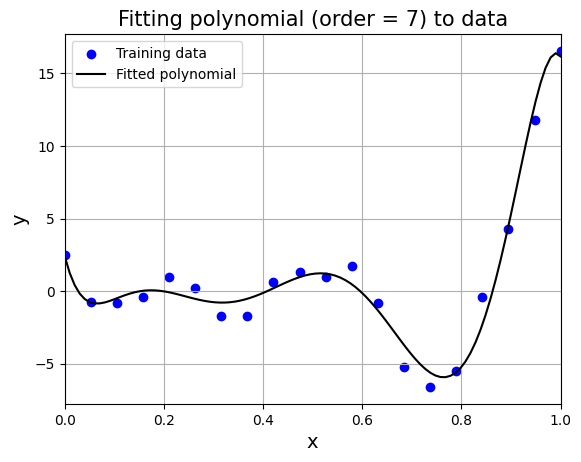

In [10]:
# initialize the polynomial model
model = Polynomial(
    xtrain=x.reshape(-1,1), 
    ytrain=y.reshape(-1,1), 
    order=7
)

w = model.fit() # fit the model

xtest = torch.linspace(xlower, xupper, 100, **args) # Test input values

ypred = model.predict(xtest.reshape(-1,1)) # Prediction

# Plotting the predicted values and data
plt.scatter(x.numpy(force=True), y.numpy(force=True), c="b", label="Training data")
plt.plot(xtest.numpy(force=True), ypred.numpy(force=True), "k", label="Fitted polynomial")
plt.xlim((xlower, xupper))
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.title("Fitting polynomial (order = 7) to data", fontsize=15)
plt.grid()

In this way, you can use simple or k-fold cross validation to identify good values of hyperparameters. This concludes polynomial model section.